In [1]:
cd /content/drive/MyDrive/Git/ICT_Visual/Code

/content/drive/MyDrive/Git/ICT_Visual/Code


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
try :
    loaded_data = np.loadtxt('../Data/diabetes.csv',delimiter=',')
    
    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]

    print(f'x_data.shape = {x_data.shape}')
    print(f't_data.shape = {t_data.shape}')

except Exception as err:

    print(str(err))

x_data.shape = (759, 8)
t_data.shape = (759, 1)


In [4]:
model = Sequential()

model.add(Dense(2, input_shape=(x_data.shape[1],), activation='softmax'))

In [5]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

Epoch 1/500
19/19 - 1s - loss: 0.7282 - accuracy: 0.5157 - val_loss: 0.6883 - val_accuracy: 0.5592 - 1s/epoch - 69ms/step
Epoch 2/500
19/19 - 0s - loss: 0.7073 - accuracy: 0.5535 - val_loss: 0.6727 - val_accuracy: 0.5658 - 186ms/epoch - 10ms/step
Epoch 3/500
19/19 - 0s - loss: 0.6924 - accuracy: 0.5799 - val_loss: 0.6617 - val_accuracy: 0.6053 - 119ms/epoch - 6ms/step
Epoch 4/500
19/19 - 0s - loss: 0.6812 - accuracy: 0.5947 - val_loss: 0.6533 - val_accuracy: 0.6184 - 85ms/epoch - 4ms/step
Epoch 5/500
19/19 - 0s - loss: 0.6727 - accuracy: 0.6096 - val_loss: 0.6470 - val_accuracy: 0.6316 - 78ms/epoch - 4ms/step
Epoch 6/500
19/19 - 0s - loss: 0.6660 - accuracy: 0.6145 - val_loss: 0.6420 - val_accuracy: 0.6513 - 172ms/epoch - 9ms/step
Epoch 7/500
19/19 - 0s - loss: 0.6605 - accuracy: 0.6161 - val_loss: 0.6380 - val_accuracy: 0.6645 - 137ms/epoch - 7ms/step
Epoch 8/500
19/19 - 0s - loss: 0.6559 - accuracy: 0.6161 - val_loss: 0.6346 - val_accuracy: 0.6579 - 130ms/epoch - 7ms/step
Epoch 9/500

In [7]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7668


[0.4770481586456299, 0.7667984366416931]

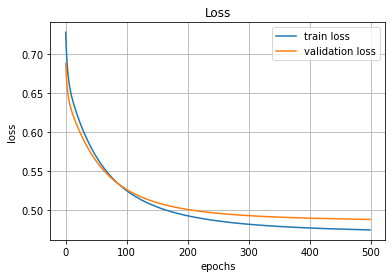

In [8]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

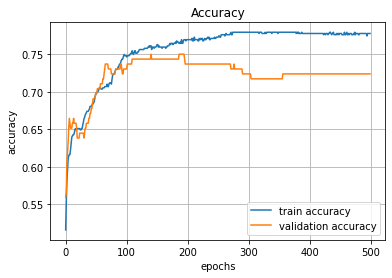

In [9]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()